In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.metrics import silhouette_score

In [6]:
data = pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\4thsem\\Part B\\4_kmeans_clustering\\kmeans_data.csv")
data.head()

,Application_received,Application_accepted,No_of_std_enrolled,Top10perc,Top25perc,Full_time_Undergrad,Part_time_Undergrad,Outstate_student,Room_Board_cost,Books_cost,Personal_spending,professor_with_PhD,professor_with_Terminal_degree,Std_Faculty_Ratio,perc_alumni_donate,instructional_Expenditure,Grad_Rate
0,1660,1232,721,23.0,52,2885.0,537,7440.0,3300.0,450,2200.0,70.0,78,18.1,12.0,7041,60
1,2186,1924,512,16.0,29,2683.0,1227,12280.0,6450.0,750,1500.0,29.0,30,12.2,16.0,10527,56
2,1428,1097,336,22.0,50,1036.0,99,11250.0,3750.0,400,1165.0,53.0,66,12.9,30.0,8735,54
3,417,349,137,60.0,89,510.0,63,12960.0,5450.0,450,875.0,92.0,97,7.7,37.0,19016,59
4,193,146,55,16.0,44,249.0,869,7560.0,4120.0,800,1500.0,76.0,72,11.9,2.0,10922,15


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Application_received            776 non-null    int64  
 1   Application_accepted            776 non-null    int64  
 2   No_of_std_enrolled              776 non-null    int64  
 3   Top10perc                       775 non-null    float64
 4   Top25perc                       776 non-null    int64  
 5   Full_time_Undergrad             775 non-null    float64
 6   Part_time_Undergrad             776 non-null    int64  
 7   Outstate_student                775 non-null    float64
 8   Room_Board_cost                 775 non-null    float64
 9   Books_cost                      776 non-null    int64  
 10  Personal_spending               775 non-null    float64
 11  professor_with_PhD              774 non-null    float64
 12  professor_with_Terminal_degree  776 

In [8]:
data.isnull().sum()

Application_received              0
Application_accepted              0
No_of_std_enrolled                0
Top10perc                         1
Top25perc                         0
Full_time_Undergrad               1
Part_time_Undergrad               0
Outstate_student                  1
Room_Board_cost                   1
Books_cost                        0
Personal_spending                 1
professor_with_PhD                2
professor_with_Terminal_degree    0
Std_Faculty_Ratio                 0
perc_alumni_donate                2
instructional_Expenditure         0
Grad_Rate                         0
dtype: int64

In [9]:
data['Top10perc'] = data['Top10perc'].fillna(data['Top10perc'].mean())
data['Full_time_Undergrad'] = data['Full_time_Undergrad'].fillna(data['Full_time_Undergrad'].mean())
data['Outstate_student'] = data['Outstate_student'].fillna(data['Outstate_student'].mean())
data['Room_Board_cost'] = data['Room_Board_cost'].fillna(data['Room_Board_cost'].mean())
data['Personal_spending'] = data['Personal_spending'].fillna(data['Personal_spending'].mean())
data['professor_with_PhD'] = data['professor_with_PhD'].fillna(data['professor_with_PhD'].mean())
data['perc_alumni_donate'] = data['perc_alumni_donate'].fillna(data['perc_alumni_donate'].mean())
data.isnull().sum()

Application_received              0
Application_accepted              0
No_of_std_enrolled                0
Top10perc                         0
Top25perc                         0
Full_time_Undergrad               0
Part_time_Undergrad               0
Outstate_student                  0
Room_Board_cost                   0
Books_cost                        0
Personal_spending                 0
professor_with_PhD                0
professor_with_Terminal_degree    0
Std_Faculty_Ratio                 0
perc_alumni_donate                0
instructional_Expenditure         0
Grad_Rate                         0
dtype: int64

In [10]:
X=data.iloc[:,: ].values
X

array([[1.6600e+03, 1.2320e+03, 7.2100e+02, ..., 1.2000e+01, 7.0410e+03,
        6.0000e+01],
       [2.1860e+03, 1.9240e+03, 5.1200e+02, ..., 1.6000e+01, 1.0527e+04,
        5.6000e+01],
       [1.4280e+03, 1.0970e+03, 3.3600e+02, ..., 3.0000e+01, 8.7350e+03,
        5.4000e+01],
       ...,
       [2.0970e+03, 1.9150e+03, 6.9500e+02, ..., 2.0000e+01, 8.3230e+03,
        4.9000e+01],
       [1.0705e+04, 2.4530e+03, 1.3170e+03, ..., 4.9000e+01, 4.0386e+04,
        9.9000e+01],
       [2.9890e+03, 1.8550e+03, 6.9100e+02, ..., 2.8000e+01, 4.5090e+03,
        9.9000e+01]])

C:\Users\prasanna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


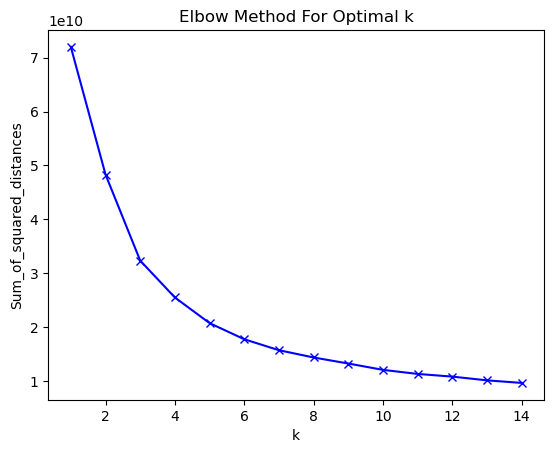

In [11]:
## Find out number clusters exist in the data
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
model = KMeans(n_clusters=2, random_state=42) 
dt_kmeans = model.fit(X)

In [13]:
dt_kmeans.labels_
data['cluster_labels'] = dt_kmeans.labels_
data.head()

,Application_received,Application_accepted,No_of_std_enrolled,Top10perc,Top25perc,Full_time_Undergrad,Part_time_Undergrad,Outstate_student,Room_Board_cost,Books_cost,Personal_spending,professor_with_PhD,professor_with_Terminal_degree,Std_Faculty_Ratio,perc_alumni_donate,instructional_Expenditure,Grad_Rate,cluster_labels
0,1660,1232,721,23.0,52,2885.0,537,7440.0,3300.0,450,2200.0,70.0,78,18.1,12.0,7041,60,1
1,2186,1924,512,16.0,29,2683.0,1227,12280.0,6450.0,750,1500.0,29.0,30,12.2,16.0,10527,56,1
2,1428,1097,336,22.0,50,1036.0,99,11250.0,3750.0,400,1165.0,53.0,66,12.9,30.0,8735,54,1
3,417,349,137,60.0,89,510.0,63,12960.0,5450.0,450,875.0,92.0,97,7.7,37.0,19016,59,1
4,193,146,55,16.0,44,249.0,869,7560.0,4120.0,800,1500.0,76.0,72,11.9,2.0,10922,15,1


In [14]:
## Silhoute coefficient for clusters

score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.560


In [15]:
model1 = KMeans(n_clusters=3, random_state=42) 
dt_kmeans = model1.fit(X)

dt_kmeans.labels_
data['cluster_labels'] = dt_kmeans.labels_
data.head()

score = silhouette_score(X, model1.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.476


In [16]:
model2 = KMeans(n_clusters=4, random_state=42) 
dt_kmeans = model2.fit(X)

dt_kmeans.labels_
data['cluster_labels'] = dt_kmeans.labels_
data.head()

score = silhouette_score(X, model2.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.382


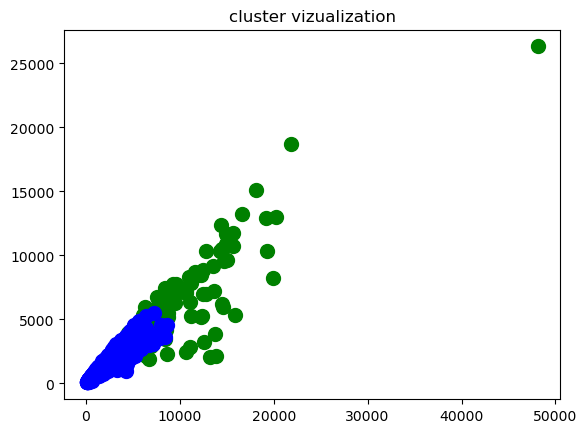

In [17]:
plt.title("cluster vizualization")

y_kmeans = model.fit_predict(X)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='green', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='red', label ='Cluster 3')

In [18]:
data.groupby('cluster_labels').agg(['mean'])

,Application_received,Application_accepted,No_of_std_enrolled,Top10perc,Top25perc,Full_time_Undergrad,Part_time_Undergrad,Outstate_student,Room_Board_cost,Books_cost,Personal_spending,professor_with_PhD,professor_with_Terminal_degree,Std_Faculty_Ratio,perc_alumni_donate,instructional_Expenditure,Grad_Rate
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_labels,,,,,,,,,,,,,,,,,
0,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,83.912207,89.554217,16.407229,15.807229,9440.951807,60.506024
1,1671.021413,1198.877944,500.167024,20.386704,48.057816,2312.732688,706.173448,8470.291403,3960.381156,531.762313,1366.420416,65.718872,73.188437,15.029550,19.584068,7311.338330,60.708779
2,9341.750000,3606.250000,1321.950000,76.050000,91.700000,5283.200000,427.200000,18119.750000,6042.750000,576.600000,1255.550000,93.300000,96.800000,6.615000,35.350000,32347.900000,88.950000
3,2328.300971,1588.466019,492.830097,37.441748,66.864078,1963.349515,304.563107,15085.771845,5180.590467,568.315534,1076.165049,82.058252,89.000000,11.750000,31.537668,12880.116505,75.703883


In [19]:
df = data.groupby('cluster_labels').describe().T
print(df[17:24])

cluster_labels                     0            1            2            3
No_of_std_enrolled mean  2939.421687   500.167024  1321.950000   492.830097
                   std   1141.064983   443.757887   526.723284   309.508100
                   min   1448.000000    35.000000   252.000000    91.000000
                   25%   2116.500000   206.500000  1039.000000   295.750000
                   50%   2546.000000   334.000000  1239.500000   450.500000
                   75%   3376.000000   653.500000  1520.000000   581.500000
                   max   6392.000000  3147.000000  2505.000000  1906.000000
